In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
def day(n):
    return datetime(2020, 2, 3) + timedelta(n)

In [3]:
rundf = pd.read_csv('results/'+
'10kCtrl1NStartNoFragOCT05-60d.csv',
                    sep=',',skiprows=6)
case="# 10000 epidemics with non-pharmaceutical containment measures "+\
     "(with h. 33% after first wave), new start, with immediate stop to fragile people of any kind (from Oct 05, 60 days), "+\
     "schools open in Sep, changing world, with using checkpoints"
md(case)

# 10000 epidemics with non-pharmaceutical containment measures (with h. 33% after first wave), new start, with immediate stop to fragile people of any kind (from Oct 05, 60 days), schools open in Sep, changing world, with using checkpoints

In [4]:
rundf.replace(-1, np.nan, inplace=True)

In [5]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

rundf["cp1totalInfected"]=rundf["cp1cRed"]+rundf["cp1cViolet"]
rundf["cp1totalInfected&Deceased"]=rundf["cp1totalInfected"]+rundf["cp1cDead"]

rundf["cp2totalInfected"]=rundf["cp2cRed"]+rundf["cp2cViolet"]
rundf["cp2totalInfected&Deceased"]=rundf["cp2totalInfected"]+rundf["cp2cDead"]

rundf["cp3totalInfected"]=rundf["cp3cRed"]+rundf["cp3cViolet"]
rundf["cp3totalInfected&Deceased"]=rundf["cp3totalInfected"]+rundf["cp2cDead"]

rundf["cp4totalInfected"]=rundf["cp4cRed"]+rundf["cp4cViolet"]
rundf["cp4totalInfected&Deceased"]=rundf["cp4totalInfected"]+rundf["cp4cDead"]

rundf["cp5totalInfected"]=rundf["cp5cRed"]+rundf["cp5cViolet"]
rundf["cp5totalInfected&Deceased"]=rundf["cp5totalInfected"]+rundf["cp5cDead"]

rundf["cp6totalInfected"]=rundf["cp6cRed"]+rundf["cp6cViolet"]
rundf["cp6totalInfected&Deceased"]=rundf["cp6totalInfected"]+rundf["cp6cDead"]

In [6]:
rundf.columns

Index(['[run number]', 'run#', '[step]', 'seed0', 'seed', 'seedD', 'cp1cRed',
       'cp1cRedNH', 'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed',
       'cp2cRedNH', 'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed',
       'cp3cRedNH', 'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed',
       'cp4cRedNH', 'cp4cViolet', 'cp4cVioletNH', 'cp4cDead', 'cp5cRed',
       'cp5cRedNH', 'cp5cViolet', 'cp5cVioletNH', 'cp5cDead', 'cp6cRed',
       'cp6cRedNH', 'cp6cViolet', 'cp6cVioletNH', 'cp6cDead',
       'cumulativeRedCount', 'cumulativeVioletCount', 'cumulativeDeadCount',
       'ticks', 'TinfSch', 'SinfSch', 'TinfNotSch', 'SinfNotSch',
       'totalInfected', 'totalInfected&Deceased', 'cp1totalInfected',
       'cp1totalInfected&Deceased', 'cp2totalInfected',
       'cp2totalInfected&Deceased', 'cp3totalInfected',
       'cp3totalInfected&Deceased', 'cp4totalInfected',
       'cp4totalInfected&Deceased', 'cp5totalInfected',
       'cp5totalInfected&Deceased', 'cp6totalInfected',
  

In [7]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [8]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,5913.0,5913.0,5913.0,5913.0
mean,1.7,367.0,921.3,409.7
std,4.2,279.3,683.5,123.5
min,0.0,0.0,4.0,229.0
25%,0.0,83.0,222.0,316.0
50%,0.0,366.0,996.0,387.0
75%,1.0,590.0,1467.0,486.0
max,42.0,1148.0,2964.0,1035.0


In [9]:
rLim=1200

In [10]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [11]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &  ticks \\
\midrule
count &     5913.0 &              5913.0 &                  5913.0 & 5913.0 \\
mean  &        1.7 &               367.0 &                   921.3 &  409.7 \\
std   &        4.2 &               279.3 &                   683.5 &  123.5 \\
min   &        0.0 &                 0.0 &                     4.0 &  229.0 \\
25\%   &        0.0 &                83.0 &                   222.0 &  316.0 \\
50\%   &        0.0 &               366.0 &                   996.0 &  387.0 \\
75\%   &        1.0 &               590.0 &                  1467.0 &  486.0 \\
max   &       42.0 &              1148.0 &                  2964.0 & 1035.0 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


# Select at cp2 (actual cumulative value, using symptomatic only,  $\approx$ 33.3, implicitly with *nan* as 0)

In [12]:
# existing epidemic a cp2 with .notnull() NB, the opposit1 is .isnull()
rundf[rundf['cp2cRed'].notnull()]['ticks'].describe().loc['count']

5913.0

In [13]:
rundf[rundf['cp2cRed'].notnull()][['cp2cRed','cp2totalInfected&Deceased']].describe()

,cp2cRed,cp2totalInfected&Deceased
count,5913.0,5913.0
mean,88.6,213.9
std,107.7,263.4
min,0.0,2.0
25%,9.0,20.0
50%,40.0,86.0
75%,142.0,354.0
max,733.0,1857.0


In [14]:
rundf[rundf['cp2cRed']>0]\
     [['cp2cRed','cp2totalInfected&Deceased']].describe()
# with data of epidemics that would have ended without New Start

,cp2cRed,cp2totalInfected&Deceased
count,5801.0,5801.0
mean,90.3,218.0
std,108.0,264.3
min,1.0,2.0
25%,10.0,22.0
50%,43.0,93.0
75%,145.0,358.0
max,733.0,1857.0


In [15]:
rundf['cp2GT70']=rundf['cp2cRed'] > 70
rundf[rundf.cp2GT70][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,2375.0,2375.0,2375.0
mean,191.4,466.0,390.9


In [16]:
rundf['cp2LE70']=rundf['cp2cRed'] <= 70
rundf[rundf.cp2LE70][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,3538.0,3538.0,3538.0
mean,19.7,44.8,422.4


In [17]:
rundf['cp2GT10']=rundf['cp2cRed'] > 10
rundf[rundf.cp2GT10][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,4318.0,4318.0,4318.0
mean,119.7,289.2,406.2


In [18]:
rundf['cp2LE10']=rundf['cp2cRed'] <= 10
rundf[rundf.cp2LE10][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,1595.0,1595.0,1595.0
mean,4.4,10.1,419.5


In [19]:
rundf['realistic_cp2']=rundf['cp2GT10'] & rundf['cp2LE70']
rundf[rundf.realistic_cp2][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,1943.0,1943.0,1943.0
mean,32.2,73.2,424.9


# Select at cp3 (actual cumulative value, using symptomatic only,  $\approx$ 37.5, implicitly with *nan* as 0)

In [20]:
# existing epidemic a cp3 with .notnull() NB, the opposit1 is .isnull()
rundf[rundf['cp3cRed'].notnull()]['ticks'].describe().loc['count']

5910.0

In [21]:
rundf['cp3GT90']=rundf['cp3cRed'] > 90 
rundf[rundf.cp3GT90][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,2974.0,2974.0,2974.0
mean,377.6,948.8,398.4


In [22]:
rundf['cp3LE90']=rundf['cp3cRed'] <= 90 
rundf[rundf.cp3LE90][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,2936.0,2936.0,2936.0
mean,19.2,42.2,421.4


In [23]:
rundf['cp3GT20']=rundf['cp3cRed'] > 20 
rundf[rundf.cp3GT20][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,3888.0,3888.0,3888.0
mean,299.2,748.4,404.6


In [24]:
rundf['cp3LE20']=rundf['cp3cRed'] <= 20 
rundf[rundf.cp3LE20][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,2022.0,2022.0,2022.0
mean,7.9,17.7,419.9


In [25]:
rundf['realistic_cp2_cp3']=rundf['realistic_cp2'] & rundf['cp3LE90'] & rundf['cp3GT20']

In [26]:
rundf[rundf.realistic_cp2_cp3][['cp2cRed','cp2totalInfected&Deceased','cp3cRed',
                                'cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,cp3cRed,cp3totalInfected&Deceased,ticks
count,825.0,825.0,825.0,825.0,825.0
mean,35.8,74.8,40.5,86.8,425.8


# Considering cp4 (actual cumulative value, using symptomatic and asymptomatic cases,  $\approx$ 200.0)

In [27]:
rundf[rundf.realistic_cp2_cp3][['cp4cRed',
                                'cp4totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp4cRed,cp4totalInfected&Deceased,ticks
count,528.0,528.0,825.0
mean,129.9,330.2,425.8


In [28]:
selectedrundf=rundf[rundf.realistic_cp2_cp3]

selectedrundf2=rundf[rundf.realistic_cp2_cp3 & (rundf['cp4totalInfected&Deceased']>rundf['cp3totalInfected&Deceased'])]



In [29]:
selectedrundf                 [['cp4cRed',
                                'cp4totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean','std']]

,cp4cRed,cp4totalInfected&Deceased,ticks
count,528.0,528.0,825.0
mean,129.9,330.2,425.8
std,89.2,230.1,148.0


In [30]:
md("# ------------------------------------------------------------\n"+\
    "# timeFunction displaying heat-maps and interval data\n"+\
    "### with the possibility of choosing the duration column (after a merge), if any\n"+\
    "# ------------------------------------------------------------")

# ------------------------------------------------------------
# timeFunction displaying heat-maps and interval data
### with the possibility of choosing the duration column (after a merge), if any
# ------------------------------------------------------------

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

def timeFunction(rundf,day0,day1,durationCol,title):
    
    rundfHere=rundf.copy()
    rundfHere=rundfHere[rundfHere[durationCol]>=day0]
    rundfHere=rundfHere[rundfHere[durationCol]<=day1]
    
    display(md ("## Epidemics with duration between {} days ({}) and {} days ({})"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"))) )
    
    
    rundfHere.rename(columns={'cumulativeRedCount': 'symptomatic',
                              'ticks':"duration"},inplace=True)
    
    tmp=rundfHere[['symptomatic','totalInfected&Deceased','duration']].describe();
    display(tmp)
    display(print(tmp.to_latex()))
    
    if rundfHere.shape[0] == 0: return
    
    for nBins in [10,20,30,60]:
        display(md ("## Epidemics with duration between {} days ({}) and {} days ({}), with {} bins"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"),nBins)) )
            
        rundfHere['totalInfected&Deceased'].plot.hist(bins=nBins, color="r",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()
        rundfHere['duration'].plot.hist(bins=nBins, color="g",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()

        # preparing data for the heat-map
        hist = plt.hist2d(x=rundfHere['duration'], y=rundfHere['totalInfected&Deceased'], 
                          bins=nBins, range=[[0, rLim], [0, 3600]])
        plt.close() #to avoid the output of hist2d
        
        zMax=np.amax(hist[0]) # max level z axis
        display(md ("With {} bins, the max value on z axis is {}, first row is {}"\
                    .format(nBins,zMax,np.transpose(hist[0])[0])))
        
        if nBins == 60: plt.figure(figsize=(20,10))
        else:           plt.figure(figsize=(8.5,4.25))
        
        lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
        ax = sns.heatmap(
            np.flip(np.transpose(hist[0]),0), 
            #robust=True, 
            norm=lognorm,
            cmap='YlGnBu',
            annot=True, fmt='.0f', 
            xticklabels=np.round(hist[1][1:],0).astype(int),
            yticklabels=np.flip(hist[2][1:],0).astype(int),
            annot_kws={"size":8}
            )

        plt.xlabel("Days")
        plt.ylabel("Total symptomatic + asymptomatic + deceased")

        plt.title(title)

        plt.show()


In [32]:
#checkpoint names
start = 0
end=rLim
cp1=[1, 30,"cp1cRed","cp1totalInfected&Deceased"]
cp2=[2,119,"cp2cRed","cp2totalInfected&Deceased"]
cp3=[3,230,"cp3cRed","cp3totalInfected&Deceased"]
cp4=[4,316,"cp4cRed","cp4totalInfected&Deceased"]
cp5=[5,364,"cp5cRed","cp5totalInfected&Deceased"]
cp6=[6,453,"cp6cRed","cp6totalInfected&Deceased"]

# synopsis

In [33]:
(selectedrundf.shape[0], selectedrundf2.shape[0])

(825, 528)

In [34]:
selectedrundf[['cp2cRed','cp2totalInfected&Deceased','cp3cRed','cp3totalInfected&Deceased','cp4cRed','cp4totalInfected&Deceased',
               'cp5cRed','cp5totalInfected&Deceased','cp6cRed','cp6totalInfected&Deceased',
               'cumulativeRedCount','totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean','std']]

,cp2cRed,cp2totalInfected&Deceased,cp3cRed,cp3totalInfected&Deceased,cp4cRed,cp4totalInfected&Deceased,cp5cRed,cp5totalInfected&Deceased,cp6cRed,cp6totalInfected&Deceased,cumulativeRedCount,totalInfected&Deceased,ticks
count,825.0,825.0,825.0,825.0,528.0,528.0,459.0,459.0,387.0,387.0,825.0,825.0,825.0
mean,35.8,74.8,40.5,86.8,129.9,330.2,212.2,556.8,328.0,872.0,209.4,541.1,425.8
std,14.4,44.2,17.1,54.5,89.2,230.1,118.0,304.3,125.9,312.6,186.6,496.9,148.0


In [35]:
tmp=selectedrundf[['cp2cRed','cp2totalInfected&Deceased','cp3cRed','cp3totalInfected&Deceased','cp4cRed','cp4totalInfected&Deceased',
               'cp5cRed','cp5totalInfected&Deceased','cp6cRed','cp6totalInfected&Deceased',
               'cumulativeRedCount','totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean','std']]
print (tmp.to_latex())

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &  cp2cRed &  cp2totalInfected\&Deceased &  cp3cRed &  cp3totalInfected\&Deceased &  cp4cRed &  cp4totalInfected\&Deceased &  cp5cRed &  cp5totalInfected\&Deceased &  cp6cRed &  cp6totalInfected\&Deceased &  cumulativeRedCount &  totalInfected\&Deceased &  ticks \\
\midrule
count &    825.0 &                      825.0 &    825.0 &                      825.0 &    528.0 &                      528.0 &    459.0 &                      459.0 &    387.0 &                      387.0 &               825.0 &                   825.0 &  825.0 \\
mean  &     35.8 &                       74.8 &     40.5 &                       86.8 &    129.9 &                      330.2 &    212.2 &                      556.8 &    328.0 &                      872.0 &               209.4 &                   541.1 &  425.8 \\
std   &     14.4 &                       44.2 &     17.1 &                       54.5 &     89.2 &                      230.1 &    118.0 &           

In [36]:
selectedrundf2             [[    'cumulativeRedCount',
                                'totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean','std']]

,cumulativeRedCount,totalInfected&Deceased,ticks
count,528.0,528.0,528.0
mean,303.9,796.8,513.4
std,171.5,449.9,111.9


In [37]:
tmp=selectedrundf2             [['cumulativeRedCount',
                                'totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean','std']]
print (tmp.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  cumulativeRedCount &  totalInfected\&Deceased &  ticks \\
\midrule
count &               528.0 &                   528.0 &  528.0 \\
mean  &               303.9 &                   796.8 &  513.4 \\
std   &               171.5 &                   449.9 &  111.9 \\
\bottomrule
\end{tabular}



## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18)

,symptomatic,totalInfected&Deceased,duration
count,825.0,825.0,825.0
mean,209.4,541.1,425.8
std,186.6,496.9,148.0
min,21.0,32.0,230.0
25%,43.0,79.0,287.0
50%,124.0,312.0,417.0
75%,378.0,1015.0,540.0
max,741.0,1753.0,1035.0


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &        825.0 &                   825.0 &     825.0 \\
mean  &        209.4 &                   541.1 &     425.8 \\
std   &        186.6 &                   496.9 &     148.0 \\
min   &         21.0 &                    32.0 &     230.0 \\
25\%   &         43.0 &                    79.0 &     287.0 \\
50\%   &        124.0 &                   312.0 &     417.0 \\
75\%   &        378.0 &                  1015.0 &     540.0 \\
max   &        741.0 &                  1753.0 &    1035.0 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 10 bins

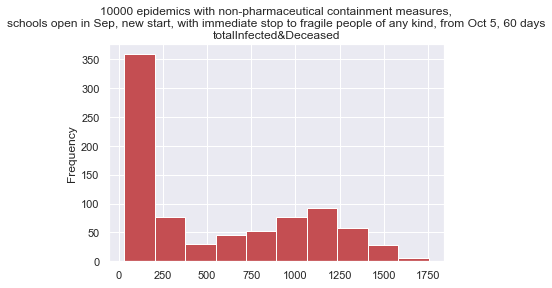

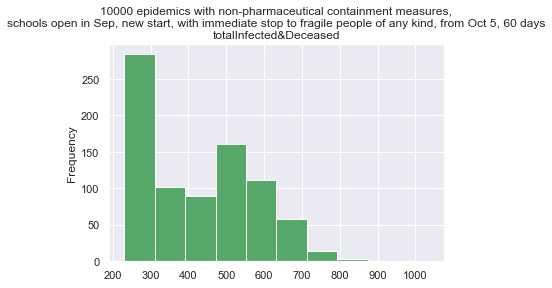

With 10 bins, the max value on z axis is 322.0, first row is [  0.  43. 322.  56.  11.   1.   0.   0.   0.   0.]

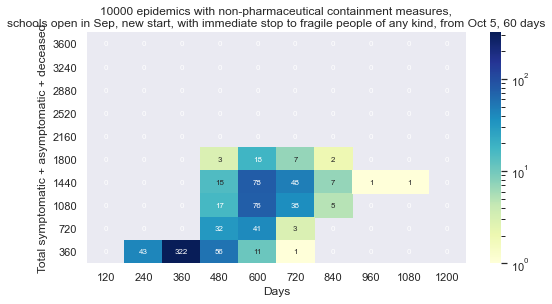

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 20 bins

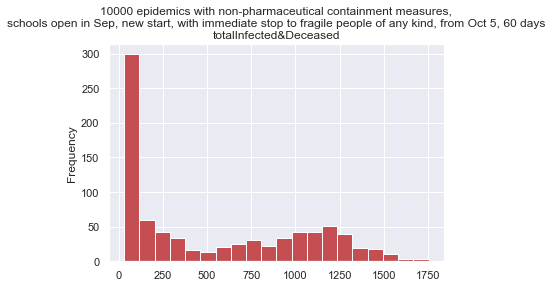

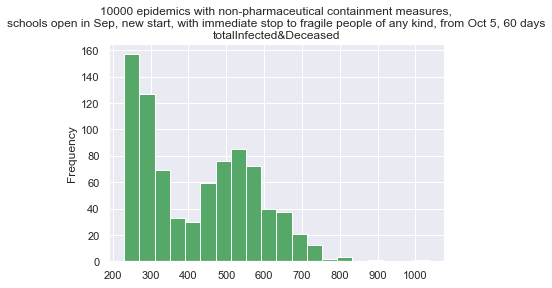

With 20 bins, the max value on z axis is 187.0, first row is [  0.   0.   0.  43. 187.  95.  19.   3.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]

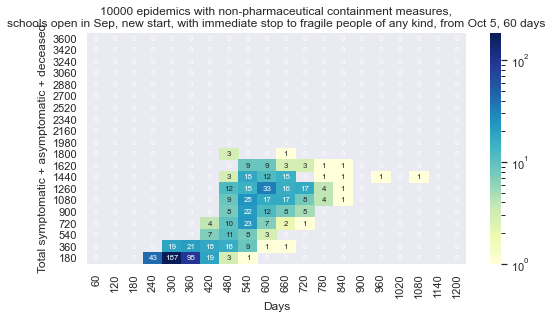

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 30 bins

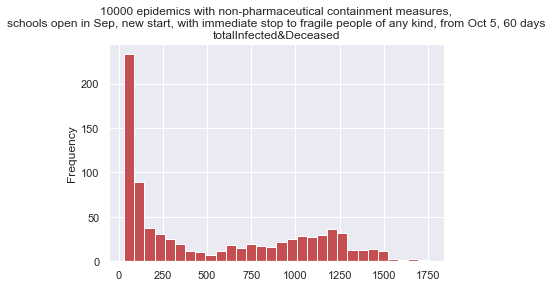

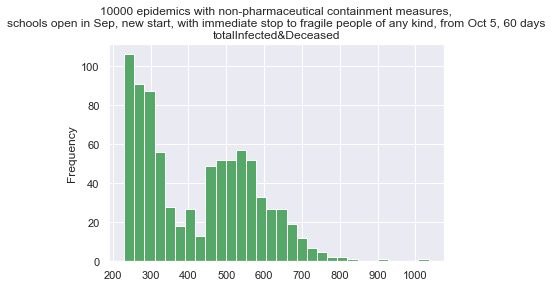

With 30 bins, the max value on z axis is 113.0, first row is [  0.   0.   0.   0.   0.  37. 113.  98.  41.   8.   3.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]

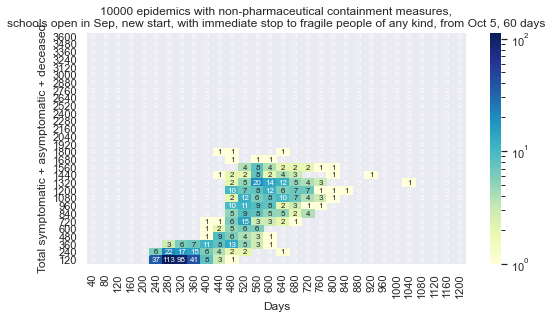

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 60 bins

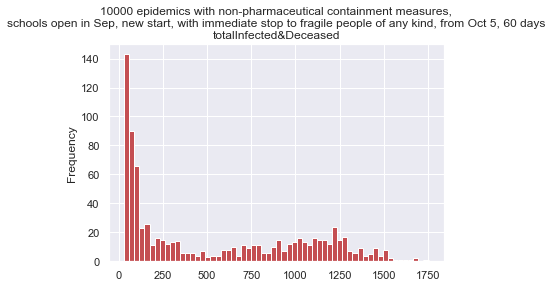

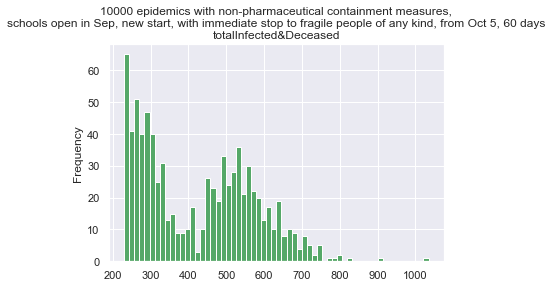

With 60 bins, the max value on z axis is 40.0, first row is [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 24. 40. 23. 23. 15.  7.  1.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]

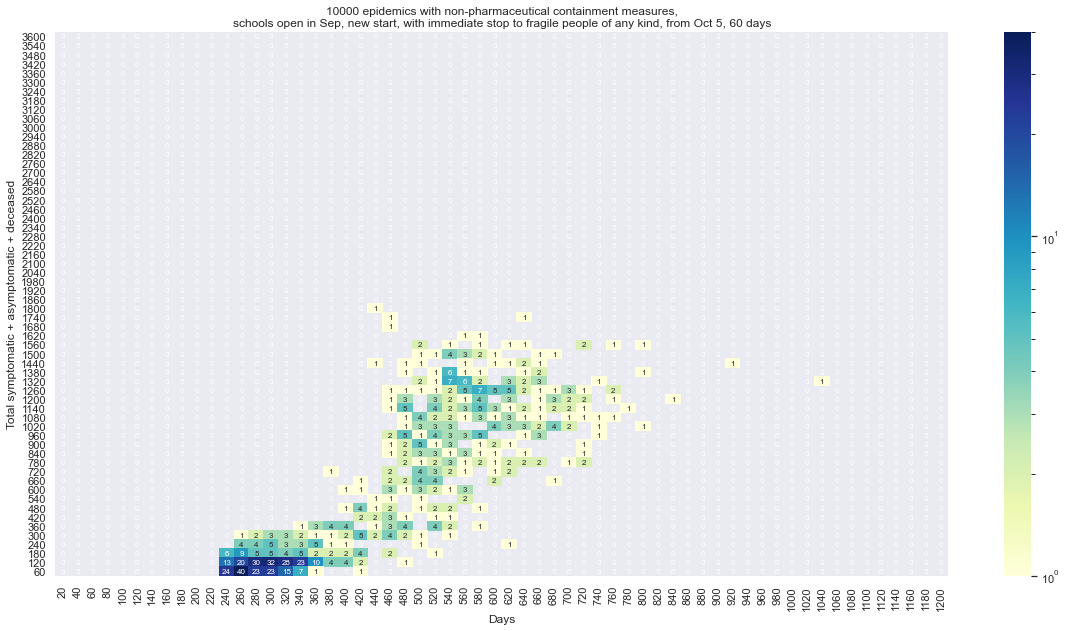

In [38]:
timeFunction(selectedrundf,start,end,"ticks",'10000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep, new start, with immediate stop to fragile people of any kind, from Oct 5, 60 days')